<a href="https://colab.research.google.com/github/suleymanacikgoz/Global_AI_Hub_Project/blob/main/globalaihubproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

In [3]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


from datetime import datetime



tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-06,186.279999,188.750000,184.800003,188.699997,188.699997,34725300,AMAZON
2024-05-07,188.919998,189.940002,187.309998,188.759995,188.759995,34048900,AMAZON
2024-05-08,187.440002,188.429993,186.389999,188.000000,188.000000,26136400,AMAZON
2024-05-09,188.880005,191.699997,187.440002,189.500000,189.500000,43368400,AMAZON
2024-05-10,189.160004,189.889999,186.929993,187.479996,187.479996,34141800,AMAZON
2024-05-13,188.000000,188.309998,185.360001,186.570007,186.570007,24898600,AMAZON
2024-05-14,183.820007,187.720001,183.449997,187.070007,187.070007,38698200,AMAZON
2024-05-15,185.970001,186.720001,182.729996,185.990005,185.990005,75459900,AMAZON
2024-05-16,185.600006,187.309998,183.460007,183.630005,183.630005,38792800,AMAZON


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)


def grab_col_names(dataframe, cat_th=13, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [5]:
cat_cols, num_cols, cat_but_car=grab_col_names(df)

Observations: 1012
Variables: 7
cat_cols: 1
num_cols: 6
cat_but_car: 0
num_but_cat: 0


In [6]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,181.744862,183.219605,180.371818,181.839388,181.255192,5.842856e+07
std,8.507714,8.331514,8.489606,8.449858,8.376169,1.870843e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,174.259995,176.300003,173.179993,174.789993,174.101410,4.696490e+07
50%,181.940002,183.089996,180.169998,181.820007,181.314072,5.370440e+07
75%,189.380005,190.070007,188.000000,189.429993,188.802673,6.543320e+07
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.632241e+08


In [7]:
for company in company_list:
  print(company.describe())

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   181.744862  183.219605  180.371818  181.839388  181.255192   
std      8.507714    8.331514    8.489606    8.449858    8.376169   
min    165.350006  166.399994  164.080002  165.000000  164.776505   
25%    174.259995  176.300003  173.179993  174.789993  174.101410   
50%    181.940002  183.089996  180.169998  181.820007  181.314072   
75%    189.380005  190.070007  188.000000  189.429993  188.802673   
max    198.020004  199.619995  197.000000  198.110001  197.589523   

             Volume  
count  2.530000e+02  
mean   5.842856e+07  
std    1.870843e+07  
min    2.404830e+07  
25%    4.696490e+07  
50%    5.370440e+07  
75%    6.543320e+07  
max    1.632241e+08  
             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   138.487344  139.983482  137.276451 

In [8]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=[f"{tech} için Kapanış Fiyatı" for tech in tech_list])

for i, company in enumerate(company_list, 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    trace = go.Scatter(x=company.index, y=company['Adj Close'], mode='lines', name=f"{tech_list[i - 1]}")
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=1000, width=1200,
    title="Historical View of the Closing Price",
    showlegend=True,
    xaxis=dict(title="Tarih"),
    yaxis=dict(title="Kapanış Fiyatı"),
    title_font=dict(size=24),
)


fig.show()


In [9]:

fig = make_subplots(rows=2, cols=2, subplot_titles=[f"{tech} için Günlük İşlem Hacmi" for tech in tech_list])


for i, (company, tech) in enumerate(zip(company_list, tech_list), 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    trace = go.Scatter(x=company.index, y=company['Volume'], mode='lines', name=f"{tech}")
    fig.add_trace(trace, row=row, col=col)


fig.update_layout(
    height=800, width=1000,
    title="Hisse Senetlerinin Günlük İşlem Hacmi",
    showlegend=True,
    xaxis=dict(title="Tarih"),
    yaxis=dict(title="Hacim"),
    title_font=dict(size=20),
)


fig.show()


In [10]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# MA hesaplamaları
ma_day = [10, 30, 60]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Subplot oluşturma
fig = make_subplots(rows=2, cols=2, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'))

# AAPL için grafik
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Adj Close'], mode='lines', name='AAPL için Kapanış'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=1, col=1)
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=1, col=1)

# GOOG için grafik
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Adj Close'], mode='lines', name='GOOG için Kapanış'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=1, col=2)
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=1, col=2)

# MSFT için grafik
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], mode='lines', name='MSFT için Kapanış'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=2, col=1)
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=2, col=1)

# AMZN için grafik
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Adj Close'], mode='lines', name='AMZN için Kapanış'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 10 days'], mode='lines', name='10 Günlük Ortalama'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 30 days'], mode='lines', name='30 Günlük Ortalama'), row=2, col=2)
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 60 days'], mode='lines', name='60 Günlük Ortalama'), row=2, col=2)

# Layout ayarları
fig.update_layout(height=1000, width=1600, title_text="Hisse Senedi Fiyatları ve Hareketli Ortalamalar")
fig.show()


In [11]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Günlük getiri oranlarının hesaplanması
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Subplot oluşturma
fig = make_subplots(rows=2, cols=2, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'))

# AAPL için grafik
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Daily Return'], mode='lines+markers', name='AAPL Daily Return'), row=1, col=1)

# GOOG için grafik
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Daily Return'], mode='lines+markers', name='GOOG Daily Return'), row=1, col=2)

# MSFT için grafik
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Daily Return'], mode='lines+markers', name='MSFT Daily Return'), row=2, col=1)

# AMZN için grafik
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Daily Return'], mode='lines+markers', name='AMZN Daily Return'), row=2, col=2)

# Layout ayarları
fig.update_layout(height=1000, width=1600, title_text="Daily Returns of Stocks")
fig.show()


In [12]:

# Günlük getiri oranlarının hesaplanması
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Subplot oluşturma
fig = make_subplots(rows=2, cols=2, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'))

# AAPL için histogram
fig.add_trace(go.Histogram(x=AAPL['Daily Return'], nbinsx=50, name='AAPL Daily Return'), row=1, col=1)

# GOOG için histogram
fig.add_trace(go.Histogram(x=GOOG['Daily Return'], nbinsx=50, name='GOOG Daily Return'), row=1, col=2)

# MSFT için histogram
fig.add_trace(go.Histogram(x=MSFT['Daily Return'], nbinsx=50, name='MSFT Daily Return'), row=2, col=1)

# AMZN için histogram
fig.add_trace(go.Histogram(x=AMZN['Daily Return'], nbinsx=50, name='AMZN Daily Return'), row=2, col=2)

# Layout ayarları
fig.update_layout(height=800, width=1200, title_text="Histogram of Daily Returns")
fig.show()


In [21]:

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']


tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-17,NaN,NaN,NaN,NaN
2023-05-18,0.013666,0.022944,0.016793,0.014395
2023-05-19,0.000628,-0.016081,-0.002186,-0.000565
2023-05-22,-0.005481,-0.010667,0.021258,0.008921
2023-05-23,-0.015155,-0.000174,-0.020497,-0.018432


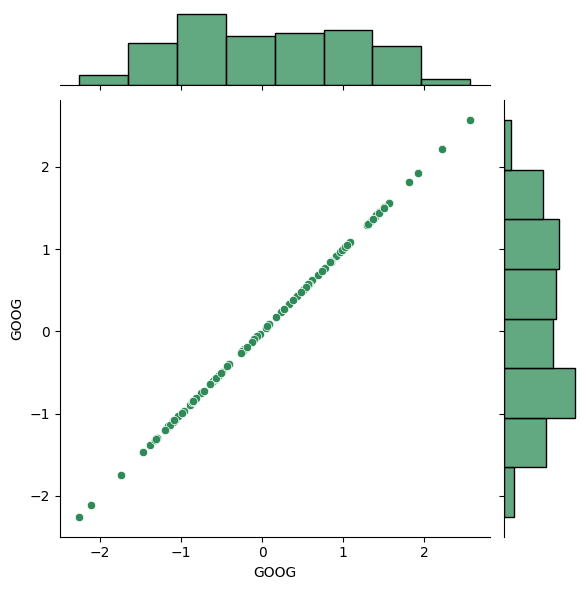

In [36]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

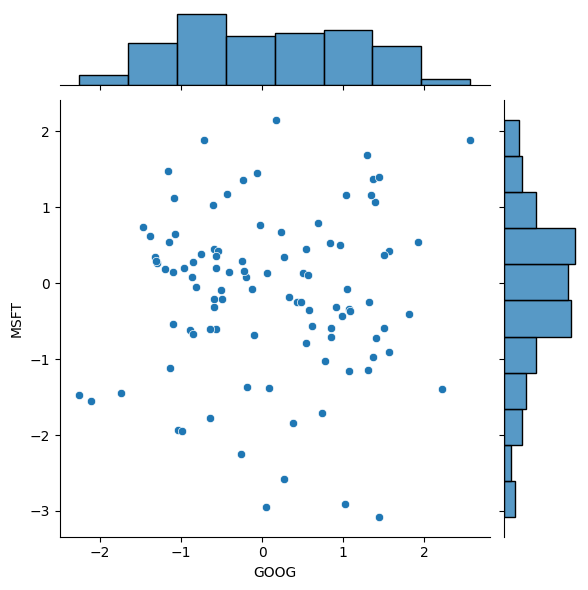

In [37]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


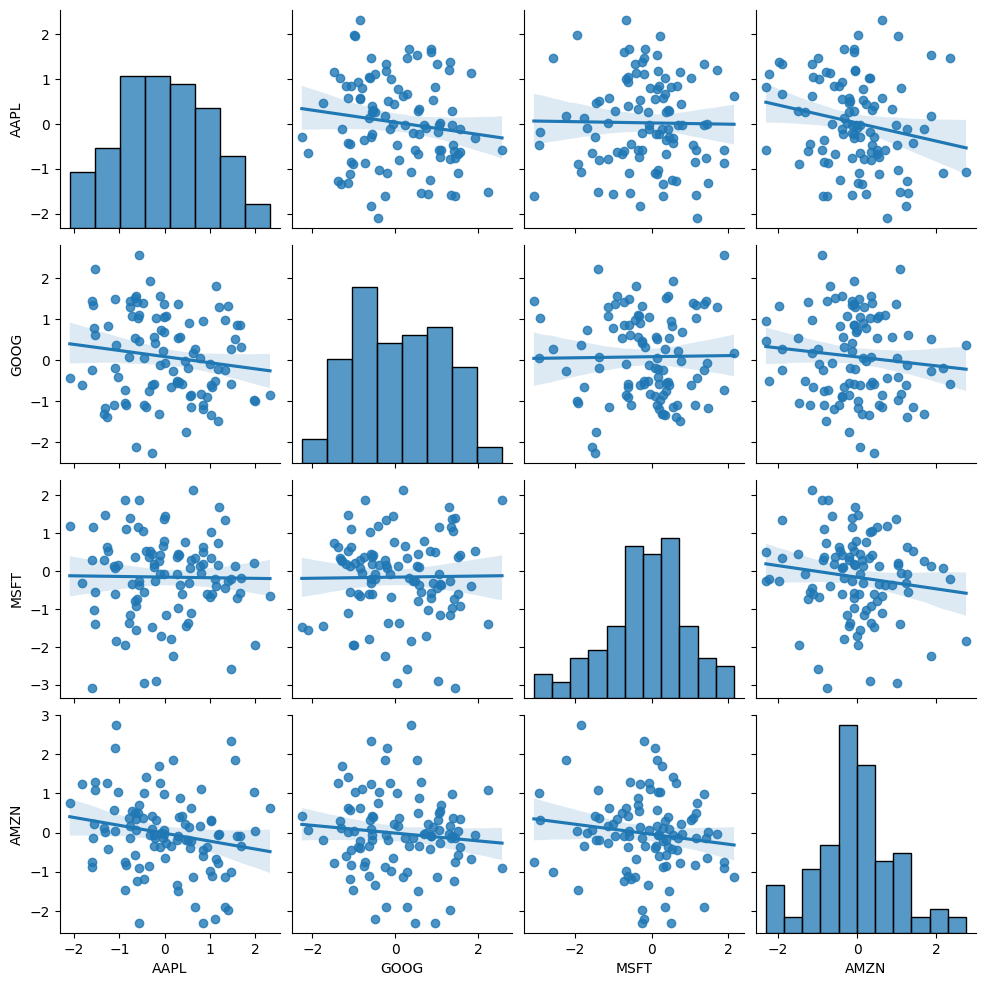

In [38]:

sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

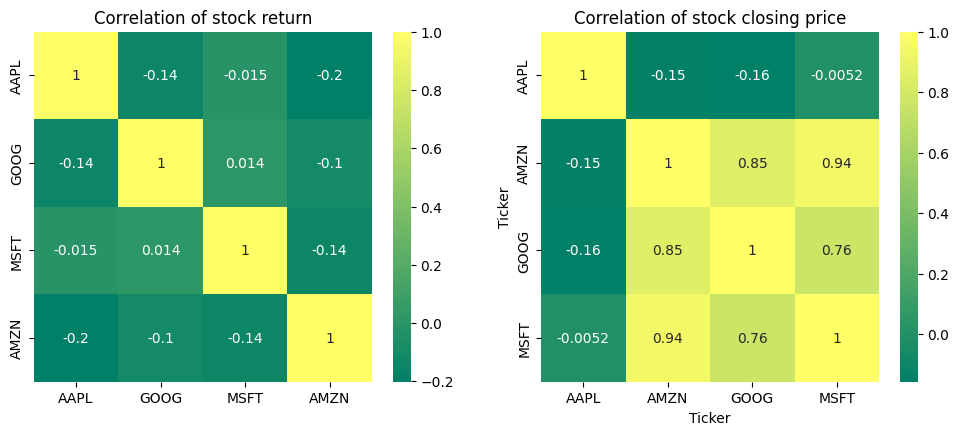

In [39]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')